Файл содержит данные по 377185 объектам недвижимости, каждый из которых описывается 17 признаками (2 из которых - json объекты, содержащие дополнительные признаки). У некоторых признаков есть пропущенные значения, которые необходимо обработать.

___


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('D:\\SF\\Final\\data.csv')
data.shape

(377185, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [6]:
data.describe().T

,count,unique,top,freq
status,337267,159,for sale,156104
private pool,4181,1,Yes,4181
propertyType,342452,1280,single-family home,92206
street,377183,337076,Address Not Disclosed,672
baths,270847,229,2 Baths,52466
homeFacts,377185,321009,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",7174
fireplace,103115,1653,yes,50356
city,377151,2026,Houston,24442
schools,377185,297365,"[{'rating': [], 'data': {'Distance': [], 'Grad...",4204
sqft,336608,25405,0,11854


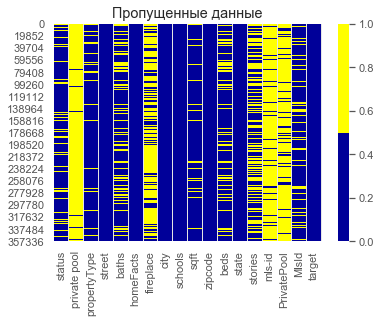

In [9]:
# Карта пропущенных значений
plt.style.use('ggplot')
plt.title('Пропущенные данные')
matplotlib.rcParams['figure.figsize'] = (20,10)

pd.options.mode.chained_assignment = None

cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [12]:
# Процентный список пропущенных данных
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 3)))

status - 10.583%
private pool - 98.892%
propertyType - 9.208%
street - 0.001%
baths - 28.193%
homeFacts - 0.0%
fireplace - 72.662%
city - 0.009%
schools - 0.0%
sqft - 10.758%
zipcode - 0.0%
beds - 24.201%
state - 0.0%
stories - 39.958%
mls-id - 93.387%
PrivatePool - 89.313%
MlsId - 17.731%
target - 0.658%


# Предобработка данных

После извлечения признаков из колонок homeFacts и schools, и предварительной предобработки 
направленной на избавление от пропусков (числовые заменены на -1 или -999, категориальные заменены на 'no data')
получено 31 признак по каждому объекту

In [76]:
data = pd.read_csv('D:\\SF\\Final\\data_post_preprocesing.csv')
data.shape

(306476, 31)

In [77]:
data.columns

Index(['status', 'propertyType', 'street', 'baths', 'city', 'sqft', 'zipcode',
       'beds', 'state', 'stories', 'target', 'private_pool', 'mls_Id',
       'Heating', 'Cooling', 'Parking', 'lotsize', 'Price/sqft', 'baths_count',
       'fireplace_yes_no', 'year_built', 'remodeled_year', 'school_count',
       'school_rating_mean', 'school_distance_mean', 'preschool',
       'kindergarten', 'elementary_school', 'middle_school', 'high_school',
       'private_school'],
      dtype='object')

# Status

Думаю имеет смысл оставить топ 5-6 значений остальное заменить на 'other'

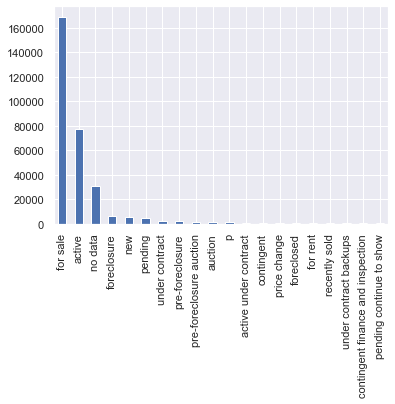

In [78]:
data['status'].value_counts().head(20).plot.bar()

# propertyType

In [31]:
data['propertyType'].value_counts().head(30)

single family                   156074
condo                            35084
no data                          28502
lot/land                         18653
townhouse                        14985
multi family                     10689
land                              9313
condo/townhome/row/coop           5680
traditional                       3805
coop                              3621
mobile/manufactured               2327
detached                          1550
high rise                         1319
ranch                             1210
contemporary                      1149
single detached, traditional      1010
apartment                          815
colonial                           799
mfd/mobile                         688
contemporary/modern                593
single detached                    449
transitional                       344
other                              341
farms/ranches                      338
bungalow                           280
garden                   

Кроме домов присутствуют просто земли, квартиры, многоквартирные дома, ранчо и фермы, сады и прочее

# city

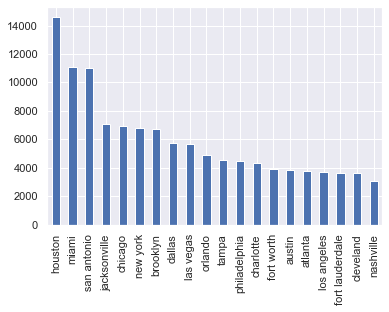

In [58]:
data['city'].value_counts().head(20).plot.bar()

# state

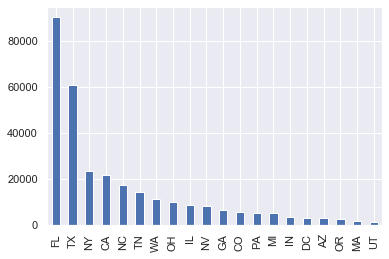

In [59]:
data['state'].value_counts().head(20).plot.bar()

# Heating

Думаю имеет смысл оставить топ 5-6 значений остальное заменить на 'other'

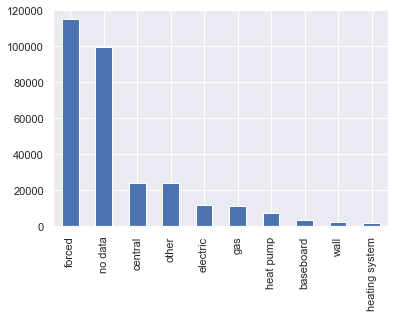

In [55]:
data['Heating'].value_counts().head(10).plot.bar()

# Cooling

Думаю имеет смысл оставить топ 5-6 значений остальное заменить на 'other'

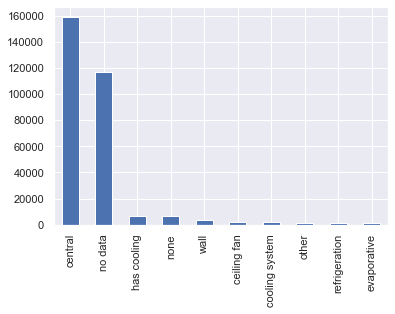

In [57]:
data['Cooling'].value_counts().head(10).plot.bar()

# sqft

In [26]:
def IQR(df, col):
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    df[col].loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, label = 'IQR')
    plt.legend();

count    3.064760e+05
mean     6.914739e+03
std      1.657798e+06
min      1.000000e+00
25%      1.013000e+03
50%      1.640000e+03
75%      2.436000e+03
max      7.959794e+08
Name: sqft, dtype: float64

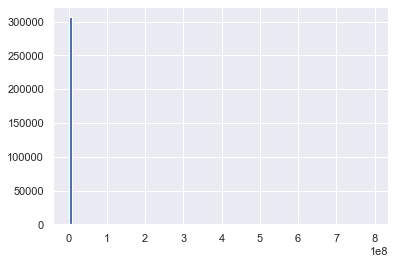

In [19]:
data['sqft'].hist(bins=100)
data['sqft'].describe()

In [ ]:
Есть аномально высокие значения

25-й перцентиль: 1013.0, 75-й перцентиль: 2436.0, IQR: 1423.0,  Границы выбросов: [-1121.5, 4570.5].


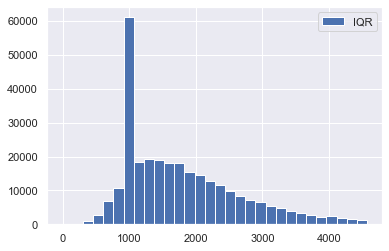

In [50]:
IQR(data, 'sqft')

# stories

count    306476.000000
mean          1.137322
std           3.055510
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1002.000000
Name: stories, dtype: float64

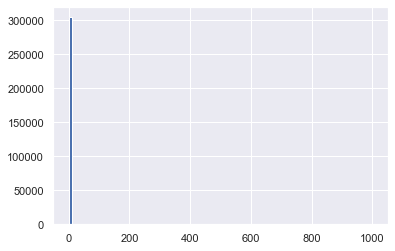

In [80]:
data['stories'].hist(bins=100)
data['stories'].describe()

Есть аномально высокие значения

25-й перцентиль: 0.0, 75-й перцентиль: 2.0, IQR: 2.0,  Границы выбросов: [-3.0, 5.0].


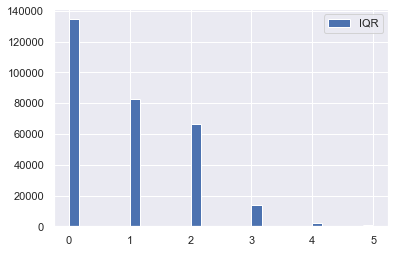

In [62]:
IQR(data, 'stories')

# beds

count    306476.000000
mean          5.642634
std        1435.721306
min          -1.000000
25%          -1.000000
50%           3.000000
75%           4.000000
max      708248.000000
Name: beds, dtype: float64

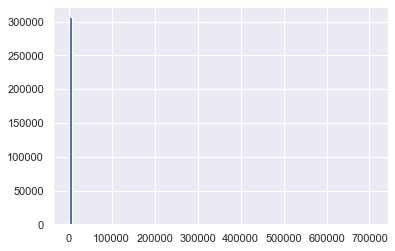

In [63]:
data['beds'].hist(bins=100)
data['beds'].describe()

Есть аномально высокие значения, пустые значения были заменены -1 на предварительной обработке

25-й перцентиль: -1.0, 75-й перцентиль: 4.0, IQR: 5.0,  Границы выбросов: [-8.5, 11.5].


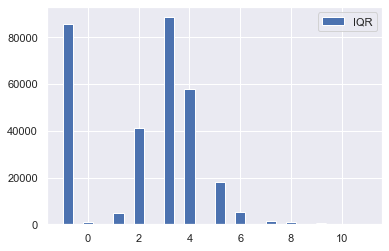

In [64]:
IQR(data, 'beds')

# Земельный участок

count    3.064760e+05
mean     1.099679e+05
std      8.665540e+06
min      0.000000e+00
25%      0.000000e+00
50%      6.198000e+03
75%      1.119725e+04
max      2.147484e+09
Name: lotsize, dtype: float64

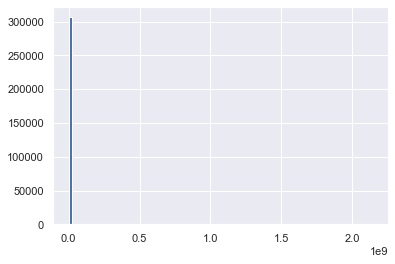

In [66]:
data['lotsize'].hist(bins=100)
data['lotsize'].describe()

Есть аномально высокие значения

25-й перцентиль: 0.0, 75-й перцентиль: 11197.25, IQR: 11197.25,  Границы выбросов: [-16795.875, 27993.125].


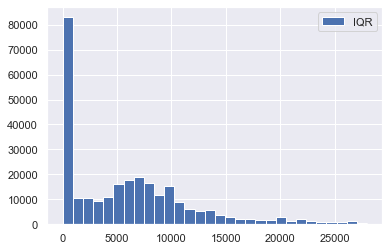

In [65]:
IQR(data, 'lotsize')

# Price/sqft

count    3.064760e+05
mean     5.889202e+02
std      1.923817e+04
min      0.000000e+00
25%      1.320000e+02
50%      2.170000e+02
75%      6.270000e+02
max      5.950000e+06
Name: Price/sqft, dtype: float64

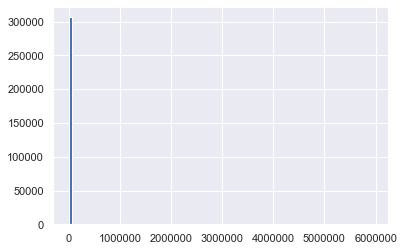

In [67]:
data['Price/sqft'].hist(bins=100)
data['Price/sqft'].describe()

Есть аномально высокие значения

25-й перцентиль: 132.0, 75-й перцентиль: 627.0, IQR: 495.0,  Границы выбросов: [-610.5, 1369.5].


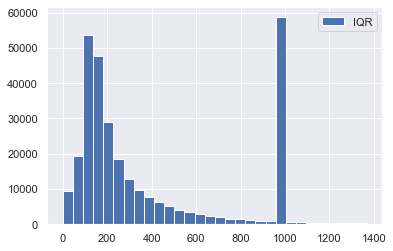

In [68]:
IQR(data, 'Price/sqft')

большая группа объектов с ценой около 1000 $/sqft

# target

count    3.064760e+05
mean     6.649371e+05
std      2.694195e+06
min      1.000000e+00
25%      1.850000e+05
50%      3.200000e+05
75%      5.950000e+05
max      9.663330e+08
Name: target, dtype: float64

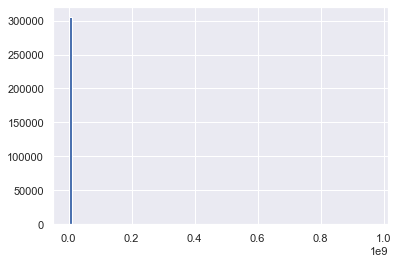

In [69]:
data['target'].hist(bins=100)
data['target'].describe()

Есть аномально высокие значения

25-й перцентиль: 185000.0, 75-й перцентиль: 595000.0, IQR: 410000.0,  Границы выбросов: [-430000.0, 1210000.0].


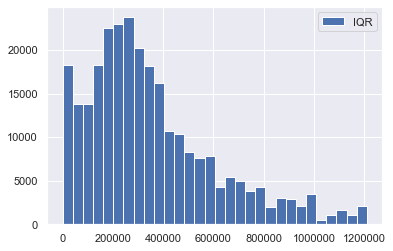

In [70]:
IQR(data, 'target')

# количество ванных комнат

count    306476.000000
mean          2.023111
std          16.366865
min          -1.000000
25%          -1.000000
50%           2.000000
75%           3.000000
max         750.000000
Name: baths_count, dtype: float64

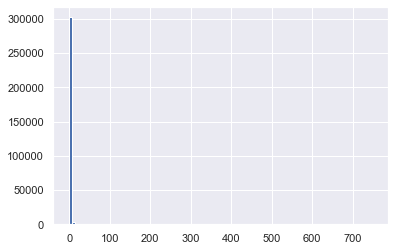

In [71]:
data['baths_count'].hist(bins=100)
data['baths_count'].describe()

Есть аномально высокие значения, пропуски были заменены на -1 на предобработке

25-й перцентиль: -1.0, 75-й перцентиль: 3.0, IQR: 4.0,  Границы выбросов: [-7.0, 9.0].


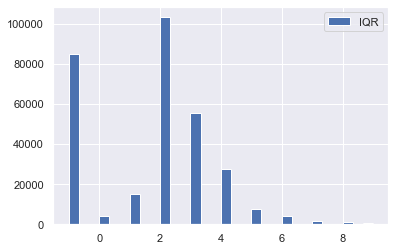

In [72]:
IQR(data, 'baths_count')

# year_built, remodeled_year

count    306476.000000
mean       1442.667005
std        1144.449497
min        -999.000000
25%        1924.000000
50%        1973.000000
75%        2004.000000
max        2025.000000
Name: year_built, dtype: float64

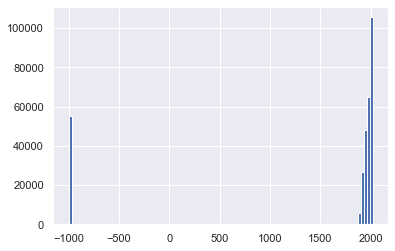

In [73]:
data['year_built'].hist(bins=100)
data['year_built'].describe()

Пропуски были заменены на -999, присутствует год 2025, возможно строящийся объект

25-й перцентиль: 1924.0, 75-й перцентиль: 2004.0, IQR: 80.0,  Границы выбросов: [1804.0, 2124.0].


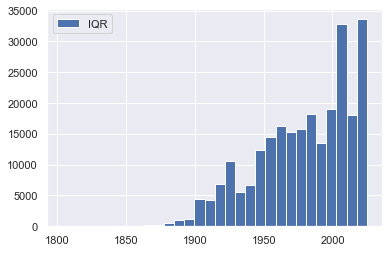

In [74]:
IQR(data, 'year_built')

count    306476.000000
mean       1458.063248
std        1135.643268
min        -999.000000
25%        1928.000000
50%        1980.000000
75%        2006.000000
max        2025.000000
Name: remodeled_year, dtype: float64

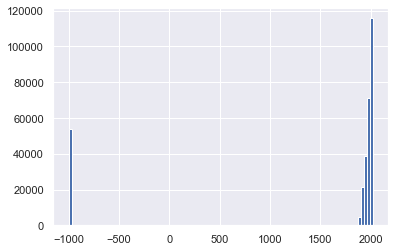

In [75]:
data['remodeled_year'].hist(bins=100)
data['remodeled_year'].describe()

25-й перцентиль: 1928.0, 75-й перцентиль: 2006.0, IQR: 78.0,  Границы выбросов: [1811.0, 2123.0].


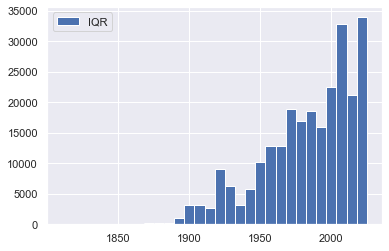

In [76]:
IQR(data, 'remodeled_year')

# Уберем редкие и выбивающиеся значения

In [59]:
def clear(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    df_clear = df.loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
    return df_clear

def clear2(df, feature):# очищаем те колонки где выбросы ярко выражены на графиках
    df_output = df.copy()
    df_output = clear(df_output, feature)
    print(df_output.shape)
    return df_output

In [90]:
good_data = clear2(data, 'sqft')
good_data = clear2(good_data, 'lotsize')
good_data = clear2(good_data, 'stories')
good_data = clear2(good_data, 'beds')
good_data = clear2(good_data, 'Price/sqft')
good_data = clear2(good_data, 'target')
good_data = clear2(good_data, 'baths_count')
good_data = clear2(good_data, 'year_built')
good_data = clear2(good_data, 'remodeled_year')

(291895, 31)
(262531, 31)
(258002, 31)
(257829, 31)
(254514, 31)
(234180, 31)
(234003, 31)
(196035, 31)
(194526, 31)


In [91]:
print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(data)))

Доля чистых значений составила: 63.5%


# Факторы, влияющие на стоимость

Зависимость цены от площади

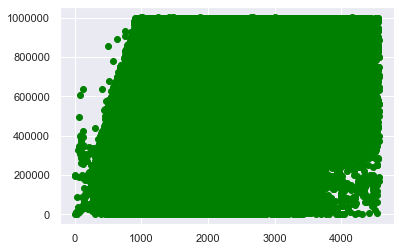

In [92]:
plt.scatter(x = good_data['sqft'], y = good_data['target'], 
             marker = 'o', c='green')

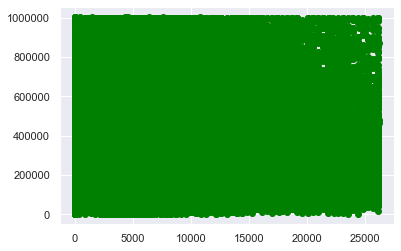

In [93]:
plt.scatter(x = good_data['lotsize'], y = good_data['target'], 
             marker = 'o', c='green')

нужно делить данные по типам объектов

Зависимость цены от числа комнат

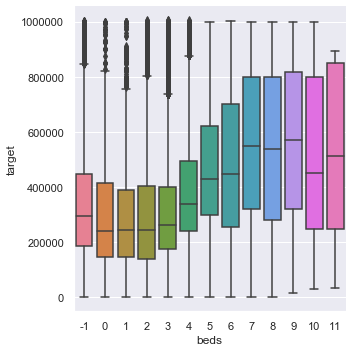

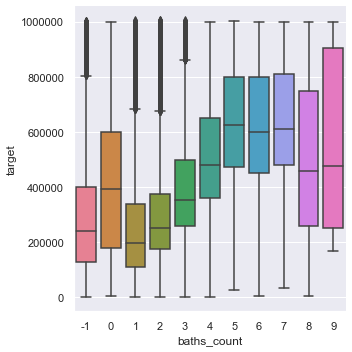

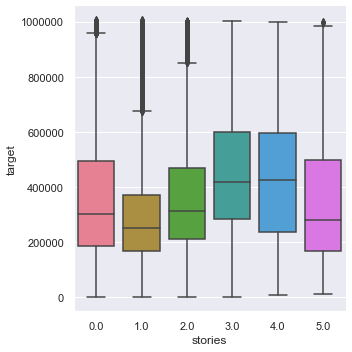

In [95]:
for column in ['beds', 'baths_count', 'stories']:
    sns.catplot(x=column, y="target", kind="box", data=good_data, palette='husl')

In [ ]:
Чем больше комнат тем цена растет